In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# Q1 Fishing
Consider three simple models of a fishery. Let $x(t)$ be the population of fish at time $t$. In the absence of fishing, the population is assumed to grow logistically, that is, 
$$ \dot{x} = r x \left(1 - \frac{x}{K} \right)$$
where $r > 0$ is the intrinsic growth rate, and $K > 0$ is the carrying capacity of the population. The effects of fishing are modeled with an additional term in the equation for $x$. The three models are as follows:

$$\begin{align*}
&\text{Model 1:}  \quad \dot{x} = r x \left(1 - \frac{x}{K} \right) - H_1 \\
&\text{Model 2:}  \quad \dot{x} = r x \left(1 - \frac{x}{K} \right) - H_2 x \\
&\text{Model 3:}  \quad \dot{x} = r x \left(1 - \frac{x}{K} \right) - H_3 \frac{x}{A + x}
\end{align*}
$$
where $H_1, H_2, H_3$, and $A$ are positive constants.
  1. For each model, give a biological interpretation of the fishing term. How do they differ? What is the meaning of the constants $H_1, H_2, H_3$, and $A$?
  2. Critique Model 1. In what situation does it fail to be realistic? *Hint: what happens when $x$ is small?*
  3. Critique Model 2. In what situation does it fail to be realistic? *Hint: what happens when $x$ is large?*
  4. Which of Models 2 or 3 do you think is best and why?

# Q2 Traffic Light
Suppose a traffic light has only two colors, red and green, indicating stop and go, respectively. The traffic light is broken and does not respond properly to signals to switch between red and green. Instead, the traffic light randomly switches based on a simple Markov process. 
$$ \text{(red)} {{\alpha \atop\longrightarrow}\atop{\longleftarrow\atop \beta}} \text{(green)}, $$
where $\alpha >0$ and $\beta>0$ are transition rate parameters.
Let $N\in \{0, 1\}$ be the state of the traffic light. Assign integers to represent the two states: $N=0$ for $\text{red}$ and $N=1$ for $\text{green}$. **Please include a copy or screen shot of your code with your answers.**

Hint: Start by copying the stochastic exponential growth code into a new cell. Modify the code to the traffic light model. Identify how the parameters (i.e., the transition rates change). You might want to review the Week 1 beginner Python notebook on `if` statements. In the stochastic exponential growth model, the variable $N$ could be any positive integer. What values can $N$ take for the traffic light model?

  1. Write a Python routine to simulate the traffic light. Save each step of the process into an array, one for $N$ and one for $t$. Set $\alpha = 1$. Pick a few different values for $\beta>0$ and let the process run for 100 steps. Plot $N$ vs $t$ for each choice of $\beta$.
  2. Run the process for 50 time steps. Compute the fraction of time the traffic light spends in the $\text{green}$ state. *Hint: one way to do this is as follows. Initialize a variable `Tgreen=0` before the start of the simulation loop to keep track of the total time in the green state. Each time the light switches from green to red, add the time $\tau$ to the running total (i.e., `Tgreen = Tgreen + tau`). At the end of the loop, the fraction is given by `Tgreen` divided by the total time.*
  3. Repeat (2) with 100, 500, 1000, 5000 time steps. Repeat this for a few different choices of $\alpha>0$ and $\beta>0$. What happens when $\alpha = \beta$? Does the fraction of time the traffic light spends in the $\text{green}$ state converge and if so, to what?


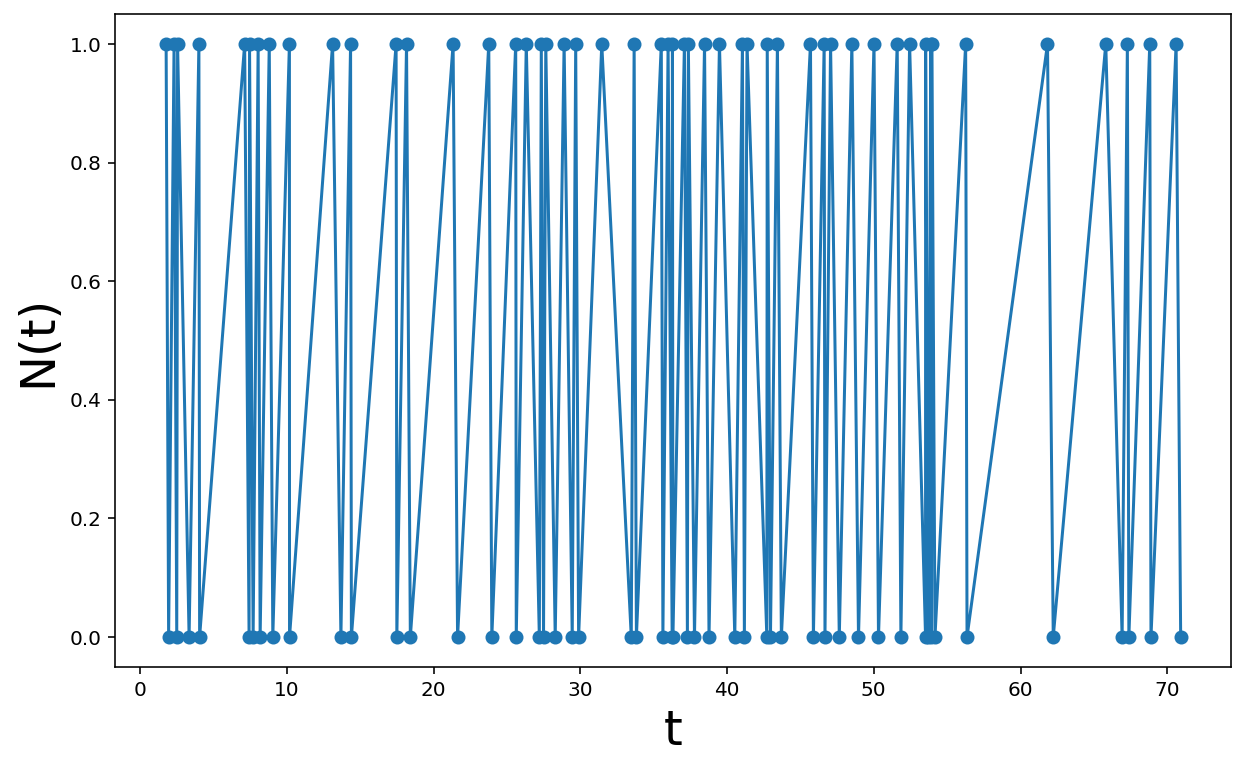

In [2]:
alpha = 1
beta = 2
n0 = 0
Nsteps = 100
T = zeros(Nsteps)
T[0] = 0
N = zeros(Nsteps)
N[0] = n0
for j in arange(Nsteps): ## compute the rate using if statement
    u = rand(1)[0]
    if N[j-1] == 1: 
        rate = beta
    else:
        rate = alpha
    tau = -log(u)/rate
    T[j] = T[j-1] + tau ## t += tau is the same as t = t + tau
    N[j] = 0 if N[j-1]==1 else 1 ## you can put an if statement in one line like this

figure(1, [10, 6])
plot(T, N, '-o')
xlabel('t', fontsize=24)
ylabel('N(t)', fontsize=24);

## Traffic light problem analysis: part 2 and 3

The following is an explanation. It does not necessarily represent my expectation of what your answer must be.

$$
\text{Green}
{{\alpha \atop\longrightarrow}\atop {\longleftarrow \atop \beta }}
\text{Red}
$$
The Master equation for the probability distribution
$$ p(t) = 
\begin{bmatrix}
p_0(t) \\
p_1(t)
\end{bmatrix},
$$
is given by
$$
\frac{dp}{dt} = 
\begin{bmatrix}
-\alpha & \beta \\
\alpha & -\beta
\end{bmatrix}
p
$$
The stationary distribution is
$$ \lim_{t\to\infty}p(t) = \rho =
\begin{bmatrix}
\frac{\beta}{\alpha + \beta} \\
\frac{\alpha}{\alpha + \beta}
\end{bmatrix}.
$$

As $t \to \infty$, the total fraction of time the light is green is $\rho_1 = \frac{\alpha}{\alpha + \beta}$.
It follows that the fraction of time the light is red is $1-\rho_1 = \rho_0 = \frac{\beta}{\alpha + \beta}$.

In [5]:
alpha = 1
beta = 3
n0 = 0
Nsteps = 10000
Tgreen = 0
t = 0
N = n0
## For this version of the Gillespie, we do not save all the time points into an array. 
## Instead, we only save the current value. This can save on time and memory if we do not need the whole history.
for j in arange(Nsteps):
    u = rand(1)[0]
    if N == 1:  ## compute the rate using if statement
        rate = beta
    else:
        rate = alpha
    #rate = beta if N==1 else alpha ## one way to compute the rate
    #rate = ((N==0)*alpha + (N==1)*beta) ## another way to compute rate
    tau = -log(u)/rate
    t += tau ## t += tau is the same as t = t + tau
    N = 0 if N==1 else 1 ## you can put an if statement in one line like this
    if N == 1:
        Tgreen += tau
fraction = Tgreen/t
print('The fraction of time the light is green is')
print(fraction)
print('Compare to the exact formula:')
print(beta/(alpha + beta))

The fraction of time the light is green is
0.7468738709234728
Compare to the exact formula:
0.75


# Q3: Stochastic Fishing
Adapt the simulation code for the logistic model in the Jupyter notebook in the Week 2 lecture notes to include the three fishing models from Q1 (make a new Jupyter notebook, copy the code from the Week 2 example to the new notebook, then modify the code in the new notebook). Consider each of the three models given in Q1 and construct an equivalent Markov process for each. **Please include a copy or screen shot of your code with your answers.**

Hint: Copy and paste the stochastic logistic growth code in the Week 2 notebook. Modify the code by adding a term to the death rate. For model 1, add `H1` by changing the line
```
combined_rate = n*r + epsilon*n**2*r/K
```
to
```
combined_rate = n*r + epsilon*n**2*r/K + H1
```
For model 2, add `H2*n`. For model 3, add `H3*n/(a + epsilon*n)`.

  1. For each model, demonstrate convergence (with a graph) to the ODE solution as $\epsilon \to 0$.
  2. Set $\epsilon = 1$. Run the process for 5000 time steps and plot a histogram of $N$ using the following command 

  ```hist(N[1:], bins=50, weights=diff(T));```

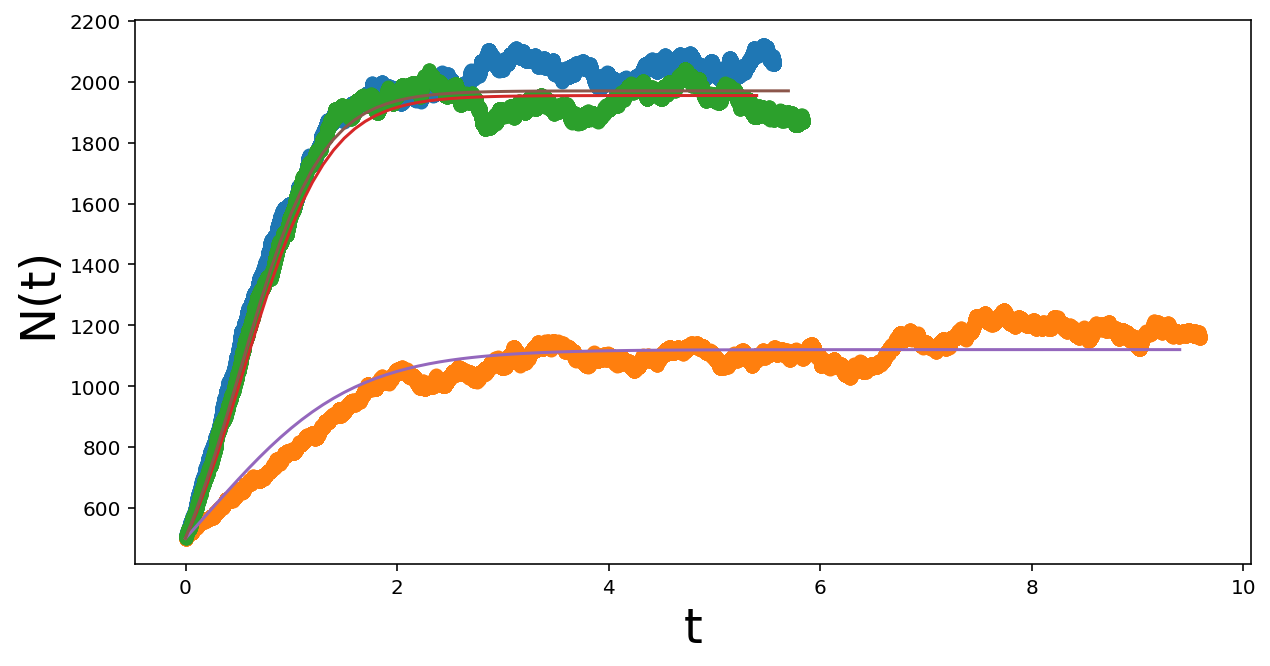

In [4]:
epsilon = 0.01 # TRY CHANGING THIS VALUE
r = 2.5
H = 1.1
A = 10
K = 20.
x0 = 5.
n0 = int(x0/epsilon)
Nsteps = 50000


def stochastic_fishing_M1(r, K, epsilon, H, n0, Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        n = N[j-1]
        combined_rate = n*r + epsilon*n**2*r/K + H
        u = rand(1)
        tau = -log(u)/combined_rate
        T[j] = T[j-1] + tau # update time array with new time value
        ## now we make a random variable to decide if birth or death occurs
        probability_of_birth = n*r/combined_rate
        probability_of_death = 1 - probability_of_birth
        u2 = rand(1)
        if u2 < probability_of_birth:
            N[j] = N[j-1] + 1 # a birth means N -> N+1
        else:
            N[j] = N[j-1] - 1

        if N[j] == 0:
                break
    return T, N
def stochastic_fishing_M2(r, K, epsilon, H, n0, Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        n = N[j-1]
        combined_rate = n*r + epsilon*n**2*r/K + H*n
        u = rand(1)
        tau = -log(u)/combined_rate
        T[j] = T[j-1] + tau # update time array with new time value
        ## now we make a random variable to decide if birth or death occurs
        probability_of_birth = n*r/combined_rate
        probability_of_death = 1 - probability_of_birth
        u2 = rand(1)
        if u2 < probability_of_birth:
            N[j] = N[j-1] + 1 # a birth means N -> N+1
        else:
            N[j] = N[j-1] - 1

        if N[j] == 0:
                break
    return T, N
def stochastic_fishing_M3(r, K, epsilon, H, A, n0, Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        n = N[j-1]
        combined_rate = n*r + epsilon*n**2*r/K + H*n/(A + epsilon*n)
        u = rand(1)
        tau = -log(u)/combined_rate
        T[j] = T[j-1] + tau # update time array with new time value
        ## now we make a random variable to decide if birth or death occurs
        probability_of_birth = n*r/combined_rate
        probability_of_death = 1 - probability_of_birth
        u2 = rand(1)
        if u2 < probability_of_birth:
            N[j] = N[j-1] + 1 # a birth means N -> N+1
        else:
            N[j] = N[j-1] - 1

        if N[j] == 0:
                break
    return T, N
def fishing_ode_M1(r, K, H, x0, Nsteps): # change `Nsteps` to alter
    ### Euler's method parameters
    Delta_t = 0.1 # The size of the time step
    x = zeros(Nsteps) # an array of zeros to store the solution in
    x[0] = x0 # store the initial condition
    def f_logistic(x): # the ligistic growth RHS function
        return r*x*(1 - x/K) - H
    ####### The simulation loop #########
    for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
        x[n] = x[n-1] + Delta_t*f_logistic(x[n-1])
        if x[n] <= 0:
            break
    t = Delta_t*arange(Nsteps)
    return t, x 
def fishing_ode_M2(r, K, H, x0, Nsteps): # change `Nsteps` to alter
    ### Euler's method parameters
    Delta_t = 0.1 # The size of the time step
    x = zeros(Nsteps) # an array of zeros to store the solution in
    x[0] = x0 # store the initial condition
    def f_logistic(x): # the ligistic growth RHS function
        return r*x*(1 - x/K) - H*x
    ####### The simulation loop #########
    for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
        x[n] = x[n-1] + Delta_t*f_logistic(x[n-1])
        if x[n] <= 0:
            break
    t = Delta_t*arange(Nsteps)
    return t, x 
def fishing_ode_M3(r, K, H, A, x0, Nsteps): # change `Nsteps` to alter
    ### Euler's method parameters
    Delta_t = 0.1 # The size of the time step
    x = zeros(Nsteps) # an array of zeros to store the solution in
    x[0] = x0 # store the initial condition
    def f_logistic(x): # the ligistic growth RHS function
        return r*x*(1 - x/K) - H*x/(A + x)
    ####### The simulation loop #########
    for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
        x[n] = x[n-1] + Delta_t*f_logistic(x[n-1])
        if x[n] <= 0:
            break
    t = Delta_t*arange(Nsteps)
    return t, x 
    
######## plot the result
fig1 = figure(1, [10, 5])
T1, N1 = stochastic_fishing_M1(r, K, epsilon, H, n0, Nsteps)
T2, N2 = stochastic_fishing_M2(r, K, epsilon, H, n0, Nsteps)
T3, N3 = stochastic_fishing_M3(r, K, epsilon, H, A, n0, Nsteps)
plot(T1, N1, '-o') # the option '-o' makes a line with 'o' symbols at the jump times
plot(T2, N2, '-o')
plot(T3, N3, '-o')
## make a logistic ODE curve for comparison
Tode1, Xode1 = fishing_ode_M1(r, K, H, x0, int(T1[-1]/0.1))
Tode2, Xode2 = fishing_ode_M2(r, K, H, x0, int(T2[-1]/0.1))
Tode3, Xode3 = fishing_ode_M3(r, K, H, A, x0, int(T3[-1]/0.1))
## remember to convert X to N
Node1 = Xode1/epsilon
Node2 = Xode2/epsilon
Node3 = Xode3/epsilon
plot(Tode1, Node1)
plot(Tode2, Node2)
plot(Tode3, Node3)
xlabel('t', fontsize=24)
ylabel('N(t)', fontsize=24);